In [1]:
# Weather forecasting of the city of São Paulo with machine learning
# Data is from INMET data bank from two stations in the city of São Paulo
# This project follows, in part, the "DataQuest Project - Predict the Weather with Machine Learning"

In [2]:
import pandas as pd
import numpy as np

In [3]:
# dados da estação mirante
# Esta estação tem dados de 2006 a 2024
est_mirante = pd.read_excel('C:\\Users\\pilar\\Documents\\Weather Forecasting with ML\\dados_A701_D_2006-07-24_2024-04-01.xlsx',
                           names = ['DATE', 'PRCP', 'TDEW', 'TMAX', 'TAVG', 'TMIN', 'HUM', 'WINDV'],
                           index_col = 'DATE')

# dados da estação interlagos
# Esta estação tem dados de 2018 a 2024
est_interlagos = pd.read_excel('C:\\Users\\pilar\\Documents\\Weather Forecasting with ML\\dados_A771_D_2018-03-13_2024-04-01.xlsx',
                           names = ['DATE', 'PRCP', 'TDEW', 'TMAX', 'TAVG', 'TMIN', 'HUM', 'WINDV'],
                           index_col = 'DATE')

In [4]:
# look at each database
# Estação Mirante - first ten lines
print(est_mirante.head(10), '\n\n\n', est_mirante.describe())

            PRCP       TDEW  TMAX       TAVG  TMIN        HUM     WINDV
DATE                                                                   
2006-07-24   NaN        NaN   NaN        NaN   NaN        NaN       NaN
2006-07-25   NaN        NaN   NaN        NaN   NaN        NaN       NaN
2006-07-26   0.0  13.550000  27.5  21.100000  15.6  64.000000  1.625000
2006-07-27   0.4  13.391667  28.2  21.454167  14.4  61.833333  1.566667
2006-07-28   0.0  16.366667  29.4  22.654167  17.5  69.541667  1.687500
2006-07-29   8.2        NaN  24.8  18.162500  17.7        NaN  2.820833
2006-07-30   0.8        NaN  13.3  11.795833  11.4        NaN  2.562500
2006-07-31  13.8        NaN  15.9  11.254167  10.5        NaN  2.070833
2006-08-01   2.6        NaN  15.2  13.345833  11.3  97.500000  1.245833
2006-08-02   0.2        NaN  15.4  14.070833  13.2  98.866667  1.866667 


               PRCP         TDEW         TMAX         TAVG         TMIN  \
count  6382.000000  6411.000000  6428.000000  6393.000000 

In [5]:
# look at each database
# Estação Interlagos - first ten lines
print(est_interlagos.head(10), '\n\n\n', est_interlagos.describe())

            PRCP       TDEW  TMAX       TAVG  TMIN        HUM     WINDV
DATE                                                                   
2018-03-13   NaN        NaN   NaN        NaN   NaN        NaN       NaN
2018-03-14   NaN        NaN   NaN        NaN   NaN        NaN       NaN
2018-03-15   NaN        NaN   NaN        NaN   NaN        NaN       NaN
2018-03-16   0.2  20.008333  27.8  24.187500  21.2  78.083333  1.804167
2018-03-17   0.0  19.929167  26.9  22.770833  20.4  84.375000  1.937500
2018-03-18   0.0  19.466667  30.8  22.437500  18.6  84.500000  1.420833
2018-03-19   0.0  20.095833  33.1  24.141667  20.8  79.666667  1.229167
2018-03-20   0.2  21.087500  29.0  23.545833  22.0  86.708333  1.529167
2018-03-21   8.8  19.083333  25.7  21.337500  19.4  87.291667  1.829167
2018-03-22   0.8  18.858333  23.3  20.283333  19.1  91.500000  2.333333 


               PRCP         TDEW         TMAX         TAVG         TMIN  \
count  2170.000000  2172.000000  2209.000000  2189.000000 

In [6]:
# Verifying data types
# In this case the date was already set as the index and the format was understood as such, however, if necessary
# it's possible to use "to_datetime(df.index)"
print(est_mirante.dtypes, '\n\n', est_interlagos.dtypes)

PRCP     float64
TDEW     float64
TMAX     float64
TAVG     float64
TMIN     float64
HUM      float64
WINDV    float64
dtype: object 

 PRCP     float64
TDEW     float64
TMAX     float64
TAVG     float64
TMIN     float64
HUM      float64
WINDV    float64
dtype: object


In [7]:
# Null entries will be dropped from the database
est_mirante = est_mirante.dropna()
est_interlagos = est_interlagos.dropna()

(<Axes: title={'center': 'Temperature'}, xlabel='DATE'>,
 <Axes: title={'center': 'Precipitation'}, xlabel='DATE'>,
 <Axes: title={'center': 'Relative Humidity'}, xlabel='DATE'>,
 <Axes: title={'center': 'Wind Velocity'}, xlabel='DATE'>)

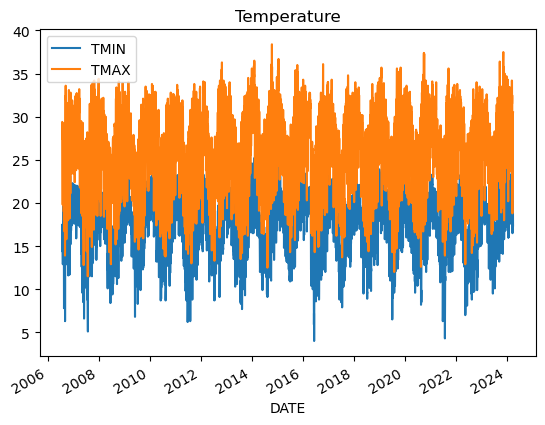

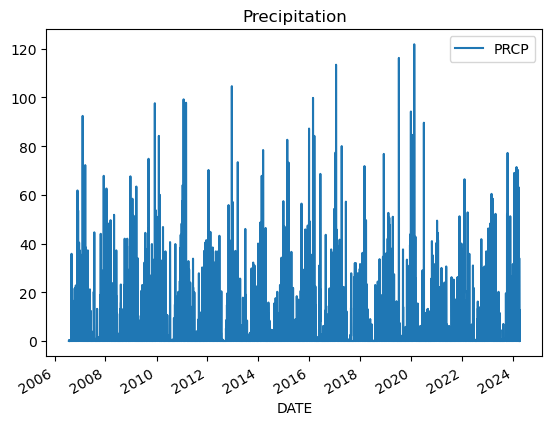

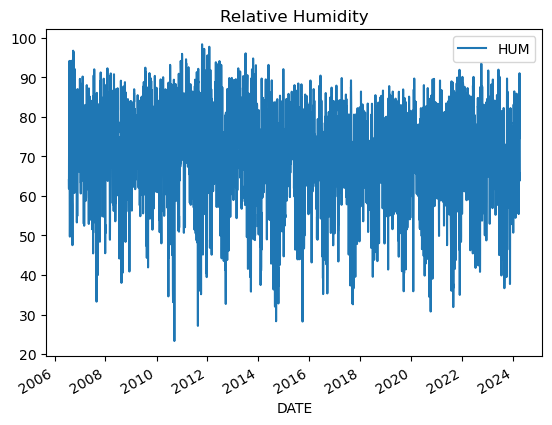

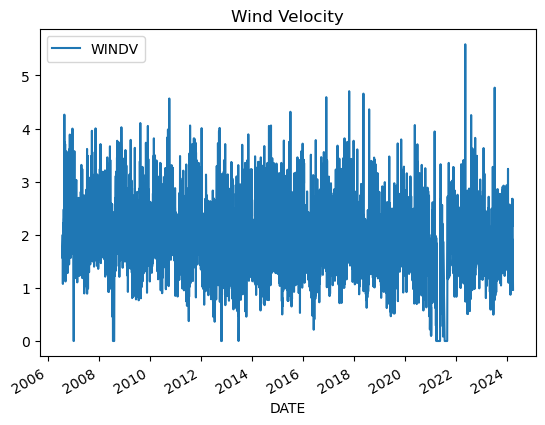

In [8]:
# Data is graphed to spot any anormalities
est_mirante[['TMIN', 'TMAX']].plot(title = "Temperature"),\
est_mirante[['PRCP']].plot(title = "Precipitation"),\
est_mirante[['HUM']].plot(title = 'Relative Humidity'),\
est_mirante[['WINDV']].plot(title = 'Wind Velocity')

(<Axes: title={'center': 'Temperature'}, xlabel='DATE'>,
 <Axes: title={'center': 'Precipitation'}, xlabel='DATE'>,
 <Axes: title={'center': 'Relative Humidity'}, xlabel='DATE'>,
 <Axes: title={'center': 'Wind Velocity'}, xlabel='DATE'>)

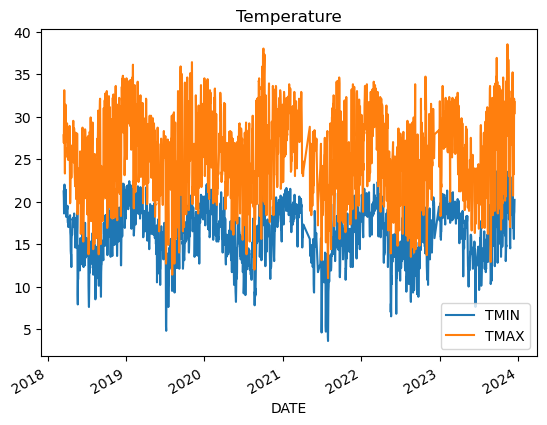

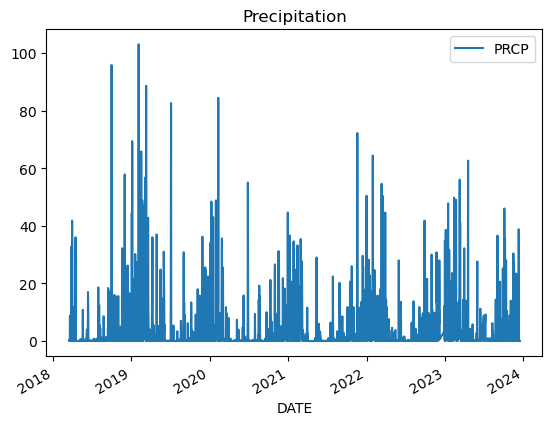

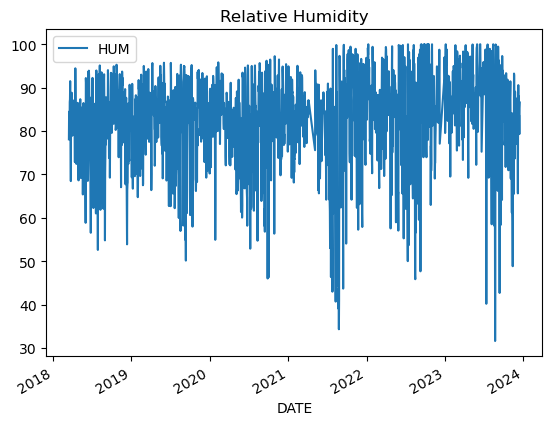

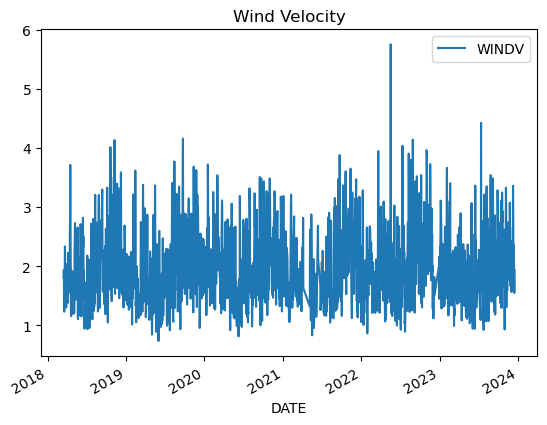

In [9]:
est_interlagos[['TMIN', 'TMAX']].plot(title = 'Temperature'),\
est_interlagos[['PRCP']].plot(title = 'Precipitation'),\
est_interlagos[['HUM']].plot(title = 'Relative Humidity'),\
est_interlagos[['WINDV']].plot(title = 'Wind Velocity')

In [10]:
# First, PRCP, TMAX, and TMIN are used as parameters for the model.
# Other parameters will be added later on to see if it increases prediction accuracy
model_data = pd.concat([est_mirante[['PRCP','TMIN', 'TMAX', 'HUM']], est_interlagos[['PRCP','TMIN', 'TMAX', 'HUM']]])
model_data

,PRCP,TMIN,TMAX,HUM
DATE,,,,
2006-07-26,0.0,15.6,27.5,64.000000
2006-07-27,0.4,14.4,28.2,61.833333
2006-07-28,0.0,17.5,29.4,69.541667
2006-08-03,0.0,13.4,19.8,94.166667
2006-08-04,0.0,13.5,24.1,80.000000
...,...,...,...,...
2023-12-12,0.4,16.8,23.2,83.708333
2023-12-13,0.0,15.6,25.1,83.583333
2023-12-14,0.0,18.5,32.1,79.291667


In [11]:
# The maximum temperature will be predicted
model_data['TARGET'] = model_data['TMAX']
model_data

,PRCP,TMIN,TMAX,HUM,TARGET
DATE,,,,,
2006-07-26,0.0,15.6,27.5,64.000000,27.5
2006-07-27,0.4,14.4,28.2,61.833333,28.2
2006-07-28,0.0,17.5,29.4,69.541667,29.4
2006-08-03,0.0,13.4,19.8,94.166667,19.8
2006-08-04,0.0,13.5,24.1,80.000000,24.1
...,...,...,...,...,...
2023-12-12,0.4,16.8,23.2,83.708333,23.2
2023-12-13,0.0,15.6,25.1,83.583333,25.1
2023-12-14,0.0,18.5,32.1,79.291667,32.1


In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

In [13]:
# tss = TimeSeriesSplit(model_data)
train = model_data.loc[model_data.index < '01-01-2022']
test = model_data.loc[model_data.index >= '01-01-2022']

In [14]:
# Ridge Linear Regression is used
reg = Ridge(alpha = 0.1)

In [15]:
# Parameters that will be used to predict maximum temperature are precipitation, minimum temperature, and humidity
predictors = ['PRCP', 'TMIN', 'HUM']

In [16]:
reg.fit(train[predictors], train['TARGET'])

Ridge(alpha=0.1)

In [17]:
# Now the model is asked to predict TMAX for the test set
predictions = reg.predict(test[predictors])

In [18]:
# Mean absolute error is calculated
mean_absolute_error(test['TARGET'], predictions)

2.3512486115588804

In [19]:
# Correlation coefficients
# precipitation and humidity seem to have a slight negative effect on TMAX
reg.coef_

array([-0.00163728,  0.88206475, -0.18941083])

<Axes: xlabel='DATE'>

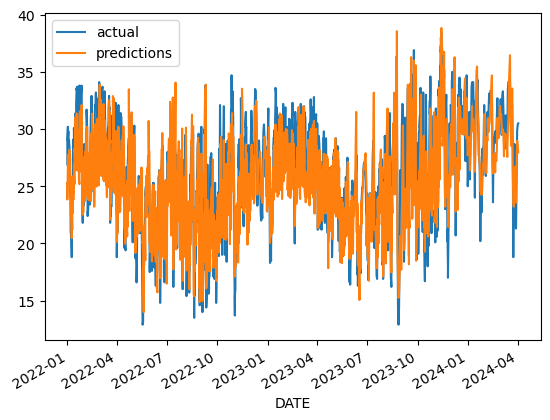

In [20]:
model_plot = pd.concat([test['TARGET'], pd.Series(predictions, index = test.index)], axis=1)
model_plot.columns = ['actual', 'predictions']
model_plot.plot()